In [2]:
import pandas as pd
import numpy as np
from numpy import array
telco = pd.read_csv(r'/Users/empty/Documents/Practice Python/Churn.csv')
telco

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [4]:
## exploring customer data
telco.info()
print(telco['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [5]:
telco.columns.values

array(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan',
       'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge',
       'State', 'Area_Code', 'Phone'], dtype=object)

In [6]:
# Check for missing or na values
telco.isna().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [7]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [8]:
# Get customer churn count
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

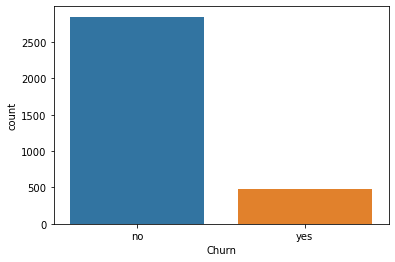

In [9]:
# Visualize the count of customer churn
sns.countplot(telco['Churn'])

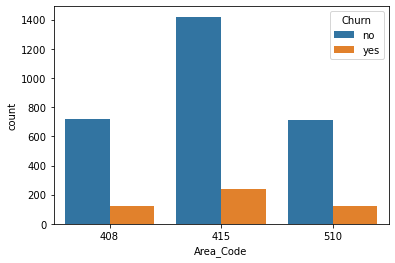

In [27]:
# Visualize the count of customer churn
sns.countplot(x= 'Area_Code', hue='Churn', data=telco)
plt.savefig("churn_byarea.jpg")

In [11]:
# What is the percentage of customers that are leaving?
num_retained = telco[telco.Churn=='no'].shape[0]
num_churned = telco[telco.Churn=='yes'].shape[0]

# Print the percentage of customers that stayed
print(num_retained/ (num_retained + num_churned) *100, '% of customers stayed with the company')

# Print the percentage of customers that left
print(num_churned / (num_retained + num_churned) *100, '% of customers left with the company')

85.5085508550855 % of customers stayed with the company
14.491449144914492 % of customers left with the company


In [12]:
custservmorethanone = telco['CustServ_Calls']>=2
custservmorethanone

0       False
1       False
2       False
3        True
4        True
        ...  
3328     True
3329     True
3330     True
3331     True
3332    False
Name: CustServ_Calls, Length: 3333, dtype: bool

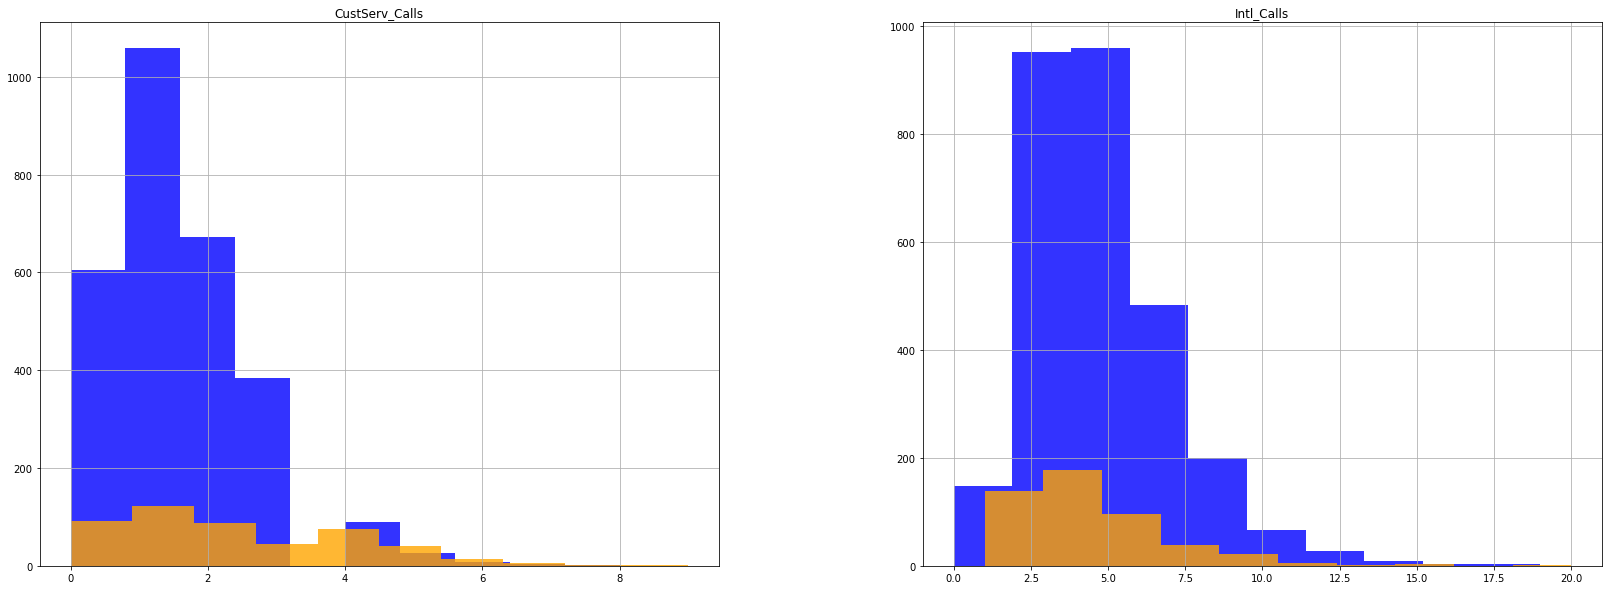

In [26]:
numerical_features = ['CustServ_Calls', 'Intl_Calls']
fig, ax = plt.subplots(1, 2, figsize=(28,10))
telco[telco.Churn=='no'][numerical_features].hist(bins=10, color='blue',alpha=0.8, ax=ax)
telco[telco.Churn=='yes'][numerical_features].hist(bins=10, color='orange',alpha=0.8, ax=ax)
plt.savefig("churn_custservcalls.jpg")
plt.show()

NameError: name 'CustServ_Calls' is not defined

In [14]:
# Group telco by 'Churn' and compute the mean
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [15]:
# Adapt code to compute the standard deviation
print(telco.groupby(['Churn']).std())

       Account_Length  Vmail_Message   Day_Mins   Eve_Mins  Night_Mins  \
Churn                                                                    
no           39.88235      13.913125  50.181655  50.292175   51.105032   
yes          39.46782      11.860138  68.997792  51.728910   47.132825   

       Intl_Mins  CustServ_Calls  Day_Calls  Day_Charge  Eve_Calls  \
Churn                                                                
no      2.784489        1.163883  19.801157    8.530835  19.958414   
yes     2.793190        1.853275  21.582307   11.729710  19.724711   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no       4.274863    19.506246      2.299768    2.441984     0.751784   
yes      4.396762    19.950659      2.121081    2.551575     0.754152   

       Area_Code  
Churn             
no     42.306156  
yes    42.792270  


In [16]:
# Average Customer Service Call by Churners
print(telco.groupby(['Churn'])["CustServ_Calls"].mean())
custcall_churn = telco.groupby('Churn').agg({'CustServ_Calls':['mean', 'min', 'max']})
print(custcall_churn)

Churn
no     1.449825
yes    2.229814
Name: CustServ_Calls, dtype: float64
      CustServ_Calls        
                mean min max
Churn                       
no          1.449825   0   8
yes         2.229814   0   9


In [17]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


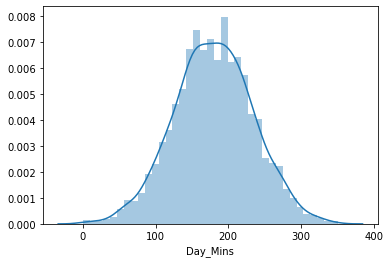

In [18]:
## data visualization

daymins = sns.distplot(telco['Day_Mins'])
plt.show()

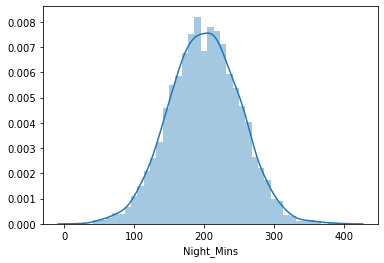

In [19]:
# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])


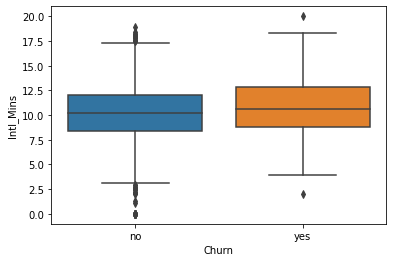

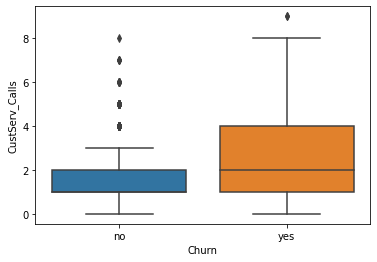

In [20]:
sns.boxplot(x = 'Churn', y = 'Intl_Mins', data = telco)
plt.show()
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco)
plt.savefig("churn_custserv.jpg")
plt.show()

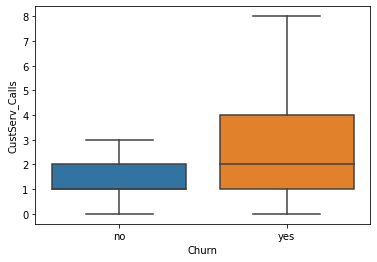

In [12]:
# Remove outliers
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "")

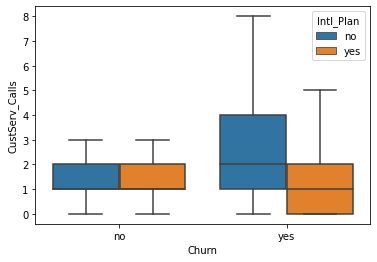

In [13]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")
plt.show()

In [14]:
telco.dtypes
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
print(telco['Vmail_Plan'].head())

0    yes
1    yes
2     no
3     no
4     no
Name: Vmail_Plan, dtype: object


In [15]:
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1})

In [16]:
# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [17]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])
# Print the head of telco_state
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  WA  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   WI  WV  WY  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 51 columns]


In [18]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [19]:
# Scale telco
print(telco['Intl_Calls'])
telco_scaled = StandardScaler().fit_transform(X=telco[['Intl_Calls', 'Night_Mins']],y=None)

0        3
1        3
2        5
3        7
4        3
        ..
3328     6
3329     4
3330     6
3331    10
3332     4
Name: Intl_Calls, Length: 3333, dtype: int64


In [20]:
# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

In [21]:
# Print summary statistics
print(telco_scaled_df.describe())

         Intl_Calls    Night_Mins
count  3.333000e+03  3.333000e+03
mean  -1.264615e-16  6.602046e-17
std    1.000150e+00  1.000150e+00
min   -1.820289e+00 -3.513648e+00
25%   -6.011951e-01 -6.698545e-01
50%   -1.948306e-01  6.485803e-03
75%    6.178983e-01  6.808485e-01
max    6.307001e+00  3.839081e+00


In [22]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


In [23]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']

In [24]:
# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [59]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[["Eve_Calls","CustServ_Calls"]], telco['Churn'])

LogisticRegression()

In [26]:
print(clf.coef_)

[[0.00123122 0.39564805]]


In [27]:
print(clf.intercept_)

[-2.61257778]


In [66]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 

# Instantiate the classifier
clf = DecisionTreeClassifier()

features = telco[["Eve_Calls","CustServ_Calls"]]

# Fit the classifier
new_customer = clf.fit(features, telco['Churn'])

In [75]:
# Predict the label of new_customer
print(clf.predict_proba(features))

[[1.         0.        ]
 [0.88461538 0.11538462]
 [0.875      0.125     ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.7        0.3       ]]


In [59]:
# Create feature variable
X = telco[['Account_Length','Vmail_Message','Day_Mins','Night_Mins', 'Intl_Mins', 'CustServ_Calls']]

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
X

,Account_Length,Vmail_Message,Day_Mins,Night_Mins,Intl_Mins,CustServ_Calls
0,128,25,265.1,244.7,10.0,1
1,107,26,161.6,254.4,13.7,1
2,137,0,243.4,162.6,12.2,0
3,84,0,299.4,196.9,6.6,2
4,75,0,166.7,186.9,10.1,3
...,...,...,...,...,...,...
3328,192,36,156.2,279.1,9.9,2
3329,68,0,231.1,191.3,9.6,3
3330,28,0,180.8,191.9,14.1,2
3331,184,0,213.8,139.2,5.0,2


In [69]:
# Import linear_model from sklearn.
from sklearn import linear_model

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model logreg and fit it to the data.
logreg = linear_model.LogisticRegression()

# Fit to the training data
logreg.fit(X_train, y_train)

# Compute accuracy
print(logreg.score(X_test, y_test))

0.843


In [71]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a logistic regression model logreg and fit it to the data.
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.884


In [79]:
cleaned_telco = telco.drop('Phone', axis=1)

# Look at the number of rows and cols in the data set
cleaned_telco.shape

(3333, 20)

In [86]:
lb = LabelEncoder()

# Convert all of the non-numeric columns to numeric
for column in cleaned_telco.columns:
    if cleaned_telco[column].dtype == np.number:
        continue
        cleaned_telco[column] = lb.fit_transform(cleaned_telco[column])

In [90]:
#Mari kita ubah

telco["vmailplan"] = lb.fit_transform(telco["Vmail_Plan"])
telco[["vmailplan", "Vmail_Plan"]].head(11)

telco["churn"] = lb.fit_transform(telco["Churn"])
telco[["churn", "Churn"]].head(11)

telco["intlplan"] = lb.fit_transform(telco["Intl_Plan"])
telco[["intlplan", "Intl_Plan"]].head(11)

,intlplan,Intl_Plan
0,0,no
1,0,no
2,0,no
3,1,yes
4,1,yes
5,1,yes
6,0,no
7,1,yes
8,0,no
9,1,yes


In [91]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,vmailplan,churn,intlplan
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,91,11.01,3,2.70,KS,415,382-4657,1,0,0
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,103,11.45,3,3.70,OH,415,371-7191,1,0,0
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,104,7.32,5,3.29,NJ,415,358-1921,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,89,8.86,7,1.78,OH,408,375-9999,0,0,1
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,121,8.41,3,2.73,OK,415,330-6626,0,0,1
